In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
%matplotlib inline

In [43]:
# plt.style.use("seaborn-darkgrid")
light_purple_bg = "#E6E6FA"  # Lavender
lighter_sub_bg = "#F8F8FF"   # GhostWhite (slightly different so subplots stand out)



In [44]:
coco1 = "#D9E4EC"
coco2 = "#B7CFDC"
coco3 = "#6AABD2"
coco4 = "#385E72"

In [45]:
# 2. Specify which columns (phenomena) you want to visualize
phenomena = ['avg_verifications', 'avg_backtracking', 'avg_subgoals', 'avg_backwards']

In [67]:
df_qwen = pd.read_csv('../results/qwen_results.csv')
df_llama = pd.read_csv('../results/llama_results.csv')

In [68]:
df_qwen = df_qwen.sort_values(by="step")
df_llama = df_llama.sort_values(by="step")

In [69]:
df_qwen_base = df_qwen[df_qwen["condition"] == "base_ppo"].sort_values("step")
df_llama_base = df_llama[df_llama["condition"] == "base_ppo"].sort_values("step")

In [63]:
qwen_blues = ["#9ecae1", "#6baed6", "#3182bd", "#08519c"]  
llama_purples = ["#bcbddc", "#9e9ac8", "#756bb1", "#54278f"]


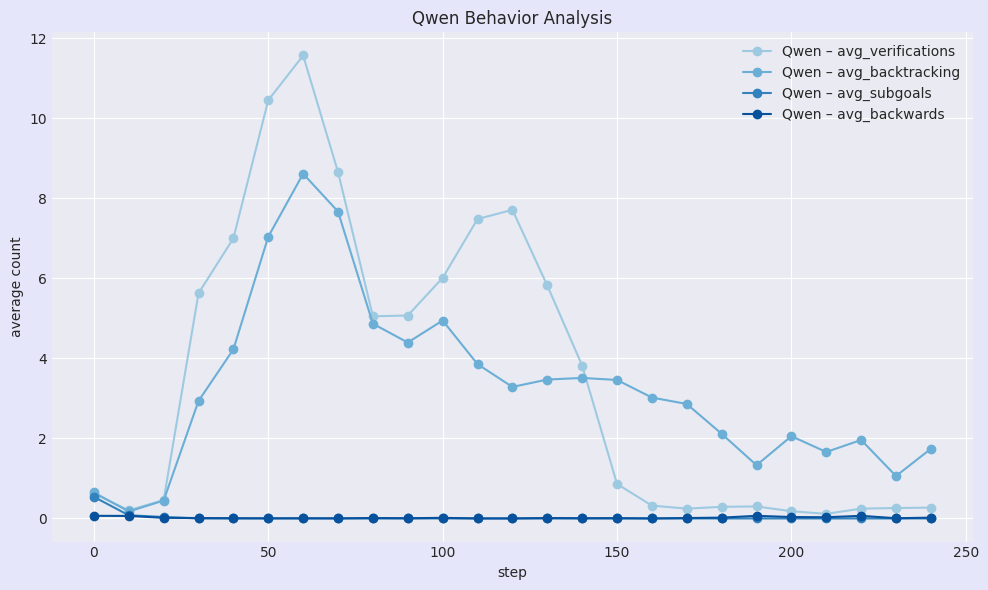

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor(light_purple_bg)
for idx, phenomenon in enumerate(phenomena):
    # Check if that column even exists in Qwen (to avoid KeyErrors)
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker="o",
            label=f"Qwen – {phenomenon}",
            color=qwen_blues[idx % len(qwen_blues)],
        )

ax.set_title("Qwen Behavior Analysis")
ax.set_xlabel("step")
ax.set_ylabel("average count")
ax.legend()
plt.tight_layout()
plt.show()

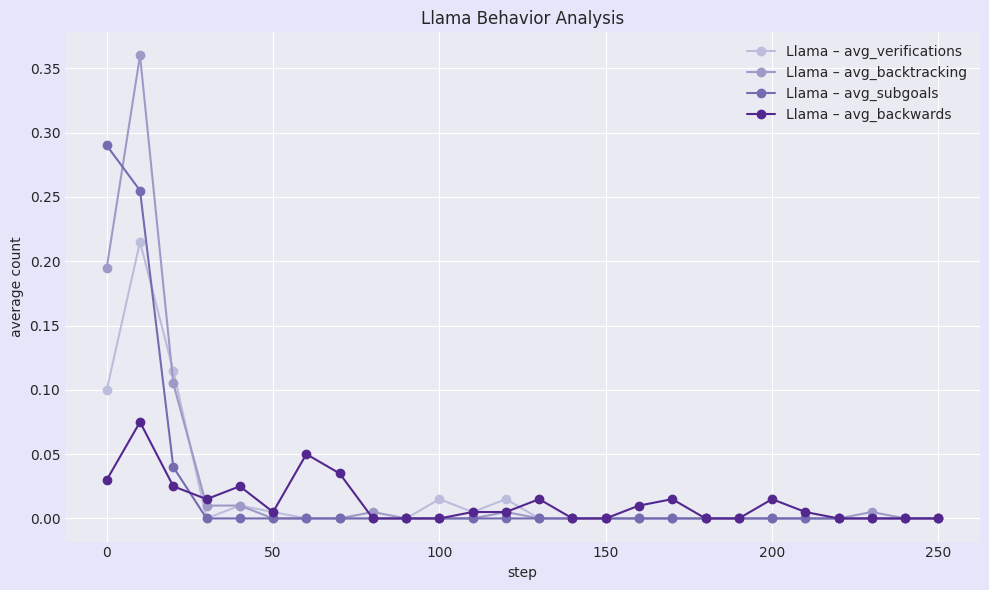

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(light_purple_bg)

for i, phenomenon in enumerate(phenomena):
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker="o",
            color=llama_purples[i % len(llama_purples)],
            label=f"Llama – {phenomenon}",
        )

ax.set_title("Llama Behavior Analysis")
ax.set_xlabel("step")
ax.set_ylabel("average count")
ax.legend()
plt.tight_layout()
plt.show()

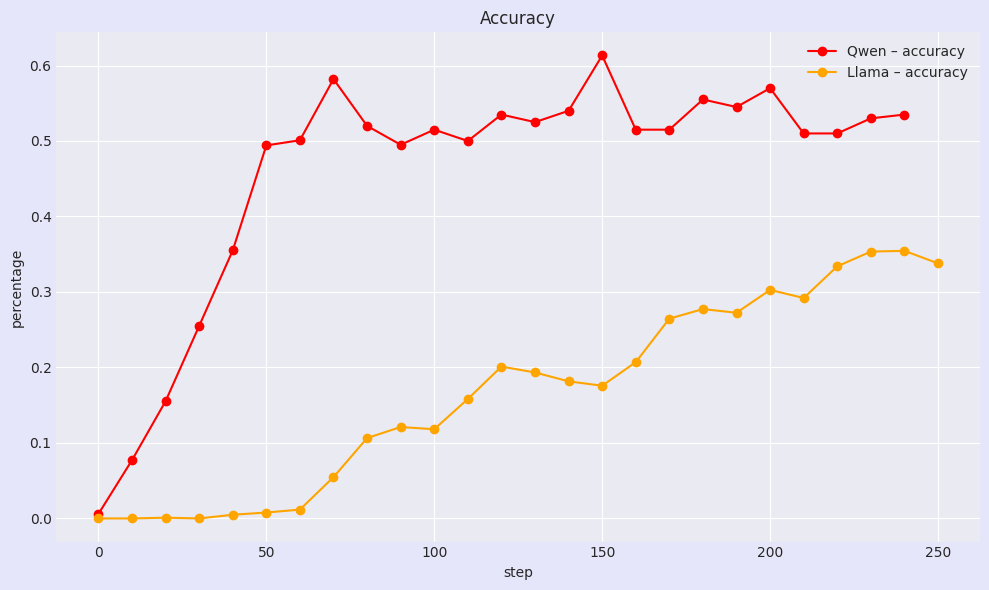

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(light_purple_bg)

statistics = ["accuracy"]

for i, phenomenon in enumerate(statistics):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker="o",
            label=f"Qwen – {phenomenon}",
            color='red',
        )
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker="o",
            color='orange',
            label=f"Llama – {phenomenon}",
        )
ax.set_title("Accuracy")
ax.set_xlabel("step")
ax.set_ylabel("percentage")
ax.legend()
plt.tight_layout()
plt.show()

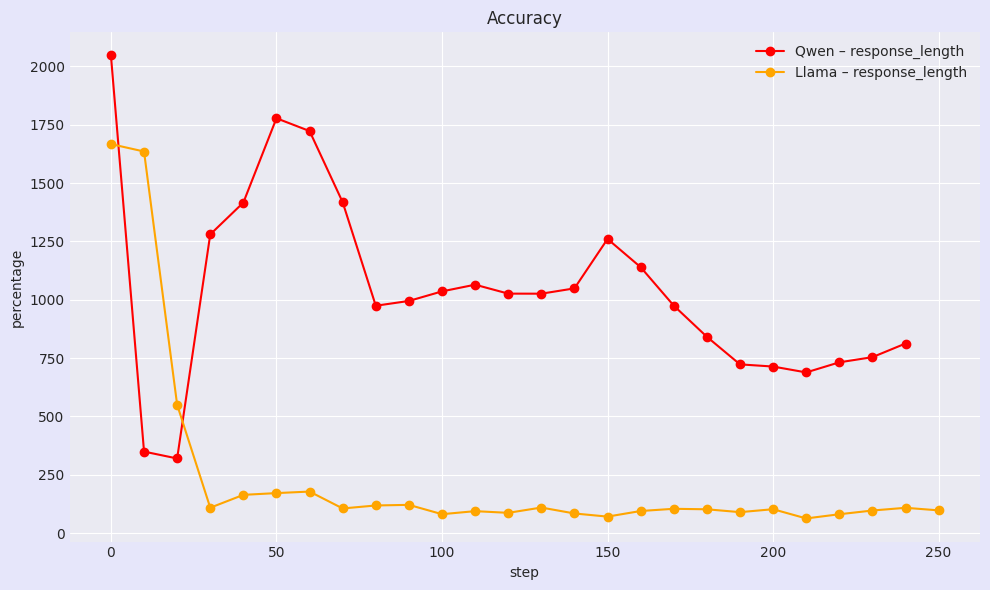

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(light_purple_bg)

statistics = ["response_length"]

for i, phenomenon in enumerate(statistics):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker="o",
            label=f"Qwen – {phenomenon}",
            color='red',
        )
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker="o",
            color='orange',
            label=f"Llama – {phenomenon}",
        )
ax.set_title("Accuracy")
ax.set_xlabel("step")
ax.set_ylabel("percentage")
ax.legend()
plt.tight_layout()
plt.show()